In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

warnings.filterwarnings("ignore")
pd.set_option('display.max.rows',169)
pd.set_option('display.max.columns',169)
pd.set_option('float_format', '{:.2f}'.format)

In [2]:
train0 = pd.read_csv('train.csv')
test0 = pd.read_csv("test_x.csv")

In [3]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7001 non-null   int64  
 1   Hour               7001 non-null   int64  
 2   Minutes            7001 non-null   int64  
 3   Sensor_alpha       7001 non-null   float64
 4   Sensor_beta        7001 non-null   float64
 5   Sensor_gamma       7001 non-null   float64
 6   Sensor_alpha_plus  7001 non-null   float64
 7   Sensor_beta_plus   7001 non-null   float64
 8   Sensor_gamma_plus  7001 non-null   float64
 9   Insect             7001 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 547.1 KB


In [4]:
test0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3000 non-null   int64  
 1   Hour               3000 non-null   int64  
 2   Minutes            3000 non-null   int64  
 3   Sensor_alpha       3000 non-null   float64
 4   Sensor_beta        3000 non-null   float64
 5   Sensor_gamma       3000 non-null   float64
 6   Sensor_alpha_plus  3000 non-null   float64
 7   Sensor_beta_plus   3000 non-null   float64
 8   Sensor_gamma_plus  3000 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 211.1 KB


In [5]:
train0.head()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.91,242.84,-316.82,250.20,-53.55,-112.05,2
1,1,10,16,-90.79,-269.47,-182.58,95.39,37.29,48.53,0
2,2,21,42,-20.03,-147.07,50.28,-90.75,-50.48,85.40,1
3,3,21,17,-21.26,0.47,-86.16,-21.81,-209.26,16.29,0
4,4,18,16,-58.15,-13.05,-156.50,48.39,-110.01,-10.29,2


In [6]:
target = train0['Insect']

train1 = train0.drop(['Unnamed: 0','Insect'], axis=1)
test1 = test0.drop('Unnamed: 0', axis=1)

data1 = pd.concat([train1, test1], axis=0).reset_index(drop=True)
data1

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,22,26,119.91,242.84,-316.82,250.20,-53.55,-112.05
1,10,16,-90.79,-269.47,-182.58,95.39,37.29,48.53
2,21,42,-20.03,-147.07,50.28,-90.75,-50.48,85.40
3,21,17,-21.26,0.47,-86.16,-21.81,-209.26,16.29
4,18,16,-58.15,-13.05,-156.50,48.39,-110.01,-10.29
...,...,...,...,...,...,...,...,...
9996,3,26,-101.91,87.34,77.19,-79.69,13.27,143.00
9997,21,6,52.42,-37.11,120.37,208.09,-135.57,-53.87
9998,21,0,-103.30,34.74,-195.02,-164.29,-26.99,6.06
9999,20,13,170.03,-73.10,-117.33,11.35,-3.37,-140.11


In [7]:
data1.describe()

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
count,10001.00,10001.00,10001.00,10001.00,10001.00,10001.00,10001.00,10001.00
mean,19.60,29.22,-0.24,-28.36,-5.76,7.15,-0.60,-0.08
std,3.51,17.32,99.26,132.99,116.54,122.30,100.05,100.64
min,1.00,0.00,-404.90,-656.27,-503.60,-437.21,-387.57,-374.96
25%,19.00,14.00,-68.64,-115.72,-83.37,-78.80,-68.40,-68.65
50%,21.00,29.00,-0.58,-34.81,-0.97,-0.98,-1.22,1.16
75%,21.00,44.00,66.15,58.06,77.85,92.37,66.91,68.15
max,23.00,59.00,361.76,518.40,378.35,465.95,345.28,370.81


In [8]:
data1['Hour'] = data1['Hour'].astype(str)

In [9]:
data1['Minutes'] = data1['Minutes'].astype(str)

In [10]:
data1['Fulltime'] = data1[['Hour', 'Minutes']].agg(':'.join, axis=1)

In [11]:
data1['Fulltime']= pd.to_datetime(data1['Fulltime'], errors = 'coerce').dt.time

In [12]:
data1['Fulltime']=data1['Fulltime'].astype(str)

In [13]:
data1.drop(['Hour','Minutes', 'Fulltime'], axis=1, inplace=True)

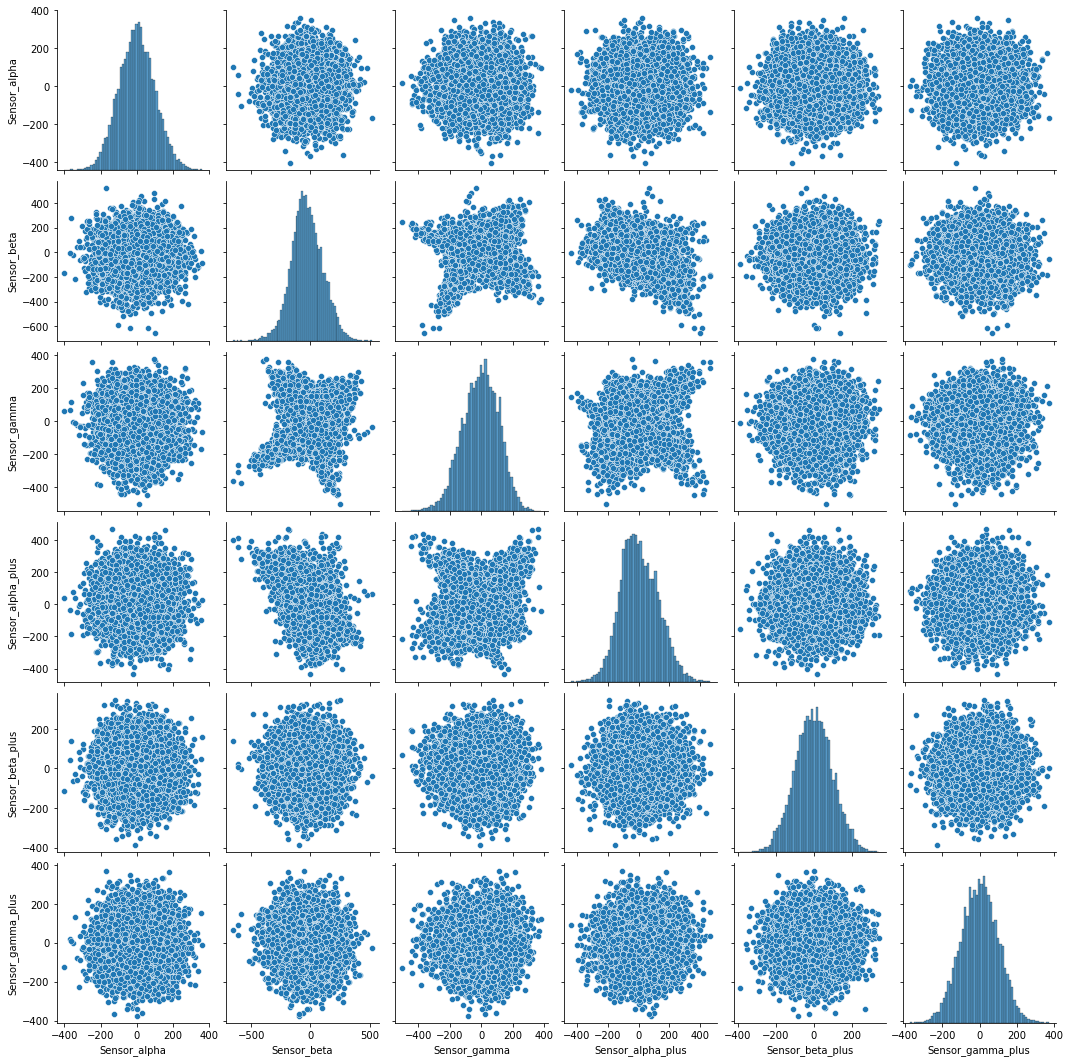

In [14]:
sns.pairplot(data1)

In [15]:
train_final = data1.loc[:train0.index.max(), :].copy()
test_final = data1.loc[train0.index.max() + 1:, :].reset_index(drop=True).copy()

In [16]:
final_training_data = pd.concat([train_final, target], axis=1)

In [17]:
final_training_data

,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,119.91,242.84,-316.82,250.20,-53.55,-112.05,2
1,-90.79,-269.47,-182.58,95.39,37.29,48.53,0
2,-20.03,-147.07,50.28,-90.75,-50.48,85.40,1
3,-21.26,0.47,-86.16,-21.81,-209.26,16.29,0
4,-58.15,-13.05,-156.50,48.39,-110.01,-10.29,2
...,...,...,...,...,...,...,...
6996,6.58,301.05,146.68,-209.48,-129.78,-51.23,1
6997,-6.17,-317.65,-161.64,248.06,-112.63,99.46,0
6998,-7.29,-406.73,-212.10,248.75,116.89,32.81,0
6999,-92.32,-191.56,88.37,38.73,-39.05,20.36,0


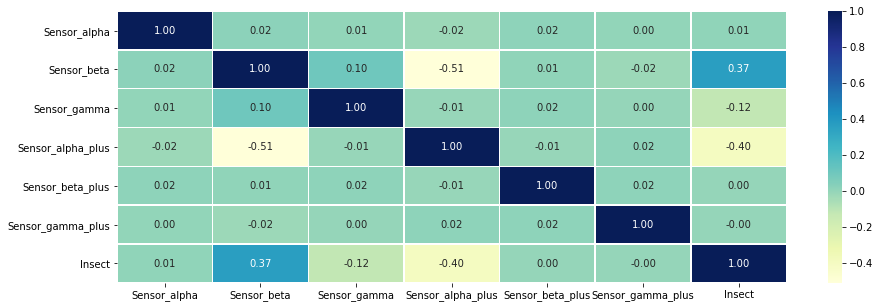

In [18]:
plt.figure(figsize=(15,5))
sns.heatmap(final_training_data.corr(),annot=True,cmap="YlGnBu", linewidths=.5,fmt='.2f')
plt.show()

In [19]:
X = final_training_data.drop(['Insect'], axis = 1)
y = final_training_data['Insect']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=final_training_data['Insect'])

In [21]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [22]:
y_res.value_counts()

0    2815
1    2815
2    2815
Name: Insect, dtype: int64

In [23]:
pipelines = {
    'rf': make_pipeline(RandomForestClassifier(random_state=42)),
    'gb': make_pipeline(GradientBoostingClassifier(random_state=42)),
    'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state= 1,solver='liblinear')),
    'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state= 1,solver='liblinear')),
    'dt': make_pipeline(DecisionTreeClassifier(random_state=42)),
    'knn': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'svc':make_pipeline(StandardScaler(),SVC(random_state=42))
}

In [24]:
for key, value in pipelines.items():
    print(key, type(value))

rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
l1 <class 'sklearn.pipeline.Pipeline'>
l2 <class 'sklearn.pipeline.Pipeline'>
dt <class 'sklearn.pipeline.Pipeline'>
knn <class 'sklearn.pipeline.Pipeline'>
svc <class 'sklearn.pipeline.Pipeline'>


In [25]:
rf_hyperparameters = {
    'randomforestclassifier__criterion':['entropy','gini'],
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_features': ['auto', 0.3, 0.6],
    'randomforestclassifier__min_samples_split':[2,3,10],
    'randomforestclassifier__min_samples_leaf':[1,3,10],
    'randomforestclassifier__bootstrap':[True, False]
}

gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators':[100, 500, 100],
    'gradientboostingclassifier__learning_rate': [0.001,0.01,0.1,0.05],
    'gradientboostingclassifier__max_depth':[3, 5, 10]
}

l1_hyperparameters = {
    'logisticregression__C': np.logspace(-3,3,7)
}
l2_hyperparameters = {
    'logisticregression__C': np.logspace(-3,3,7)
}
dt_hyperparameters = {
    "decisiontreeclassifier__max_depth" : [1,3,5,7],
    'decisiontreeclassifier__criterion':['entropy','gini'],
    'decisiontreeclassifier__splitter':['best']
}

knn_hyperparameters = {
    "kneighborsclassifier__n_neighbors": np.arange(1,50),
    "kneighborsclassifier__weights": ["uniform","distance"]
}
svc_hyperparameters = {
    'svc__C': [1.0,], 
    'svc__kernel': ['rbf',], 
    'svc__degree': [2,], 
    'svc__gamma' : [1.0,], 
    'svc__shrinking':[True,], 
    'svc__probability':[True,],
    'svc__tol': [0.001,],
    'svc__cache_size':[200,]
}


In [26]:
hyperparameter_grids = {
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters,
    'l1':l1_hyperparameters,
    'l2':l2_hyperparameters,
    'dt':dt_hyperparameters,
    'knn': knn_hyperparameters,
    'svc':svc_hyperparameters
}

In [27]:
for key in ['rf', 'gb', 'l1', 'l2', 'dt', 'knn', 'svc']:
    if key in hyperparameter_grids:
        if type(hyperparameter_grids[key]) is dict:
            print( key, 'was found, and it is a grid.' )
        else:
            print( key, 'was found, but it is not a grid.' )
    else:
        print( key, 'was not found')

rf was found, and it is a grid.
gb was found, and it is a grid.
l1 was found, and it is a grid.
l2 was found, and it is a grid.
dt was found, and it is a grid.
knn was found, and it is a grid.
svc was found, and it is a grid.


In [28]:
models = {}

for key in pipelines.keys():
    models[key]= GridSearchCV(pipelines[key], hyperparameter_grids[key], cv=10, scoring = 'f1_macro',
                             n_jobs= -1,
                             verbose = 1)
    
models.keys()

dict_keys(['rf', 'gb', 'l1', 'l2', 'dt', 'knn', 'svc'])

In [29]:
best_estimators = []

for key in models.keys():
    clf = models[key].fit(X_res,y_res)
    best_estimators.append(clf.best_estimator_)
    print(key, "is trained and tuned")
    print('Method: {} Best: {}' .format(key,clf.best_estimator_))

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 78.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 100.5min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 102.4min finished


rf is trained and tuned
Method: rf Best: Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        max_features=0.6, min_samples_split=3,
                                        n_estimators=300, random_state=42))])
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 60.1min finished


gb is trained and tuned
Method: gb Best: Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=10,
                                            n_estimators=500,
                                            random_state=42))])
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


l1 is trained and tuned
Method: l1 Best: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, penalty='l1', random_state=1,
                                    solver='liblinear'))])
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


l2 is trained and tuned
Method: l2 Best: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=10.0, random_state=1,
                                    solver='liblinear'))])
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  73 out of  80 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


dt is trained and tuned
Method: dt Best: Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=7, random_state=42))])
Fitting 10 folds for each of 98 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 980 out of 980 | elapsed:   26.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


knn is trained and tuned
Method: knn Best: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.5s finished


svc is trained and tuned
Method: svc Best: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(degree=2, gamma=1.0, probability=True, random_state=42))])


In [30]:
for key in models.keys() :
    pred = models[key].predict(X_test)
    print(key)
    print("Score del modelo (accuracy):", round(models[key].score(X_test, y_test), 3))
    print("Accuracy score:", round(accuracy_score(pred, y_test), 3))
    print("Recall score:", round(recall_score(pred, y_test, average='macro'), 3))
    print("Precision score:", round(precision_score(pred, y_test, average='macro'), 3))
    print("F1 score:", round(f1_score(pred, y_test, average='macro'), 3))
    print('---')

rf
Score del modelo (accuracy): 0.795
Accuracy score: 0.836
Recall score: 0.785
Precision score: 0.81
F1 score: 0.795
---
gb
Score del modelo (accuracy): 0.792
Accuracy score: 0.837
Recall score: 0.777
Precision score: 0.815
F1 score: 0.792
---
l1
Score del modelo (accuracy): 0.607
Accuracy score: 0.668
Recall score: 0.607
Precision score: 0.652
F1 score: 0.607
---
l2
Score del modelo (accuracy): 0.61
Accuracy score: 0.67
Recall score: 0.609
Precision score: 0.657
F1 score: 0.61
---
dt
Score del modelo (accuracy): 0.67
Accuracy score: 0.722
Recall score: 0.663
Precision score: 0.728
F1 score: 0.67
---
knn
Score del modelo (accuracy): 0.664
Accuracy score: 0.71
Recall score: 0.651
Precision score: 0.685
F1 score: 0.664
---
svc
Score del modelo (accuracy): 0.718
Accuracy score: 0.771
Recall score: 0.716
Precision score: 0.725
F1 score: 0.718
---


In [31]:
voting_c = VotingClassifier(estimators=[('rf',best_estimators[0]),
                                        ('gb',best_estimators[1]),
                                        ('l1',best_estimators[2]),
                                        ('l2',best_estimators[3]),
                                        ('dt',best_estimators[4]),
                                        ('knn', best_estimators[5]),
                                        ('svc', best_estimators[6])
                                       ],
                           voting='soft',
                           n_jobs=-1)

In [32]:
voting_c = voting_c.fit(X_res,y_res)
print("Score del modelo (accuracy):", round(voting_c.score(X_test, y_test), 3))
print("Accuracy score:", round(accuracy_score(voting_c.predict(X_test), y_test), 3))
print("Recall score:", recall_score(voting_c.predict(X_test), y_test, 
                                           average='macro'))
print("Precision score:", precision_score(voting_c.predict(X_test), y_test, average='macro'))
print("F1 score:", f1_score(voting_c.predict(X_test), y_test, average='macro'))

Score del modelo (accuracy): 0.814
Accuracy score: 0.814
Recall score: 0.7598168020962138
Precision score: 0.7849323939598207
F1 score: 0.7688732475014545
